# End of Distribution imputation

## In this method we replace missing values with far end values or extreme
## Far end value means the values after 3rd stander deviation

* # Only used when the missing values are not Random

* # Only used this Technique when the data are Normal Distribution and Skew Distribution

## For Normal Distribution used 
* ## (mean + 3 x STD)
* ## (mean - 3 x STD) 

## For Skew Distribution used (IQR proximity rule)

* ## Q1 - 1.5 X IQR
* ## Q3 + 1.5 X IQR

### Where IQR = Q3-Q1

### and Q1 = 25th Percentile
### and Q3 = 75th Percentile

# Example

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic_toy.csv',usecols=['Age','Fare','Survived'])
data.head()


,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [3]:
data.isnull().sum()


Age         177
Fare         45
Survived      0
dtype: int64

<img src="dis.png">

# Check Age Distribution

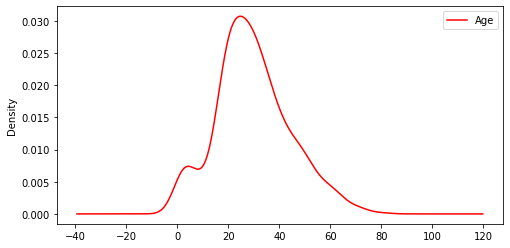

In [4]:
plt.figure(figsize=(8,4))
data.Age.plot(kind='kde',color='r')
plt.legend()

<AxesSubplot:>

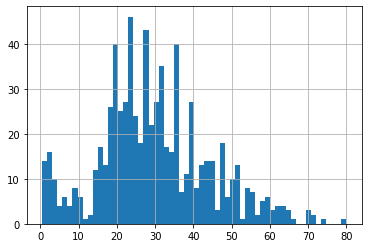

In [5]:
data.Age.hist(bins=60)

<AxesSubplot:ylabel='Age'>

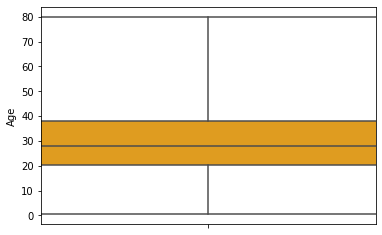

In [161]:
sns.boxplot(y=data.Age,color='orange',whis=5,width=100)

# Find mean of Age

In [81]:
mean = data['Age'].mean()
mean

29.69911764705882

# Find stander deviation of Age 

In [82]:
std = data['Age'].std()
std

14.526497332334044

## Now we have a mean and stander deviation of Age feature now we find the Far end values or extreme value

## where extreme values means the values after 3rd stander deviation
## so extreme = (Mean of Age Feature + ( 3 * stander deviation of Age Feature))

In [118]:
extreme = mean + (3 * std)
extreme

73.27860964406095

In [119]:
data["Age_Dist"] = data.Age.fillna(extreme)

In [126]:
data["Age_Median"] = data.Age.fillna(mean)

# Plot Graph

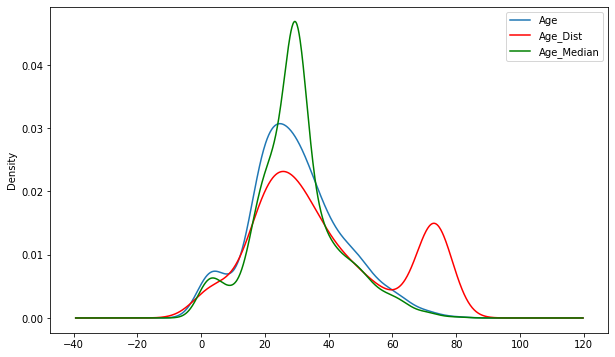

In [127]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

data.Age.plot(kind="kde",ax=ax)
data.Age_Dist.plot(kind="kde",ax=ax,color="red")
data.Age_Median.plot(kind="kde",ax=ax,color="green")


# legend
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

<AxesSubplot:>

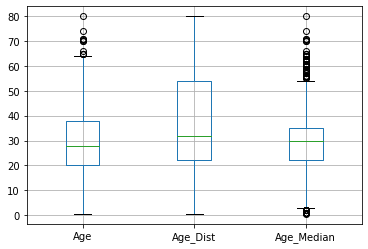

In [128]:
data[["Age","Age_Dist","Age_Median"]].boxplot()